<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Deep-Neural-Network/machine_learning_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **신경망 모델 훈련 - 드롭아웃, 콜백, 조기종료**
###시작하기 전에

1. 복습: 인공 신경망 + 심층 신경망 + 옵티마이저
2. 머신러닝: 매개변수 조정, 훈련 반복 → 모델 구조가 <font color="#ffae4a">어느 정도 고정</font>
3. 딥러닝 <font color="#ffae4a">모델의 구조</font>를 직접 만듬 → 층 추가, 뉴런 개수, 활성화함수 결정
4. 케라스 API 사요앻 모델 훈련 시 필요한 <font color="#ffae4a">다양한 도구</font>를 알아보자!

---

## **데이터 준비**
패션 MNIST 데이터셋 로딩

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42
)

> 1. 이미지 픽셀값: 0~255 범위를 <font color="#ff0000">0 ~ 1</font> 사이로 변환
2. 28x28 크기의 2차원 배열을 <font color="#ff0000">784 크기</font>의 1차원 배열로 변환
3. 훈련 세트를 <font color="#ff0000">훈련 세트와 검증 세트</font>로 분류

## **모델 생성 함수**
모델 생성 함수 정의

In [3]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

> <font color="#ff0000">a_layer 매개변수</font>: 은닉층 뒤에 또 하나의 층 추가

## **모델 생성 함수**
model_fn() 함수 호출(층 추가 x)

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> 앞서 만든 모델 결과와 <font color="#ff0000">동일!</font>

## **모델 생성 함수**

모델 훈련

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5363 - accuracy: 0.8123
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3913 - accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3179 - accuracy: 0.8862


> fit() 메서드는 <font color="#ff0000">History 클래스 객체</font> 반환
- 훈련 과정에서 계산한 지표(<font color="#ff0000">손실, 정확도 값</font>) 저장되어 있음
- 저장해서 출력해보자!

In [6]:
print(history.history.keys())

NameError: ignored

## **손실 곡선**
모델 훈련 결과를 <font color="#ffae4a">history 변수</font>에 저장

metrics 매개변수: <font color="#ffae4a">accuracy</font> 지정해야 정확도 저장

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9054
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2667 - accuracy: 0.9067
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9086
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9107
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9137


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


> history 변수에 저장된 손실과 정확도는 <font color="#ff0000">에포크마다</font> 계산한 값이 순서대로 나열된 리스트
- 👉 <font color="#ff0000">시각화</font>해보자!

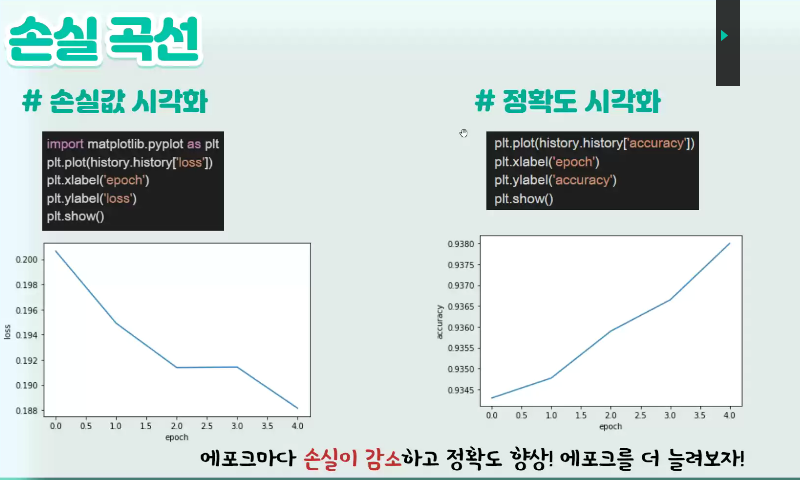

## **손실 곡선**
**손실값 시각화**

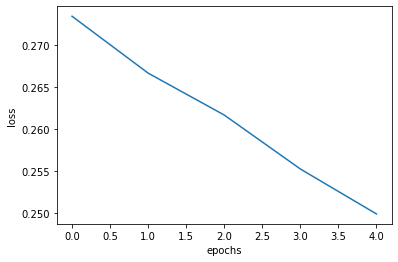

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**정확도 시각화**

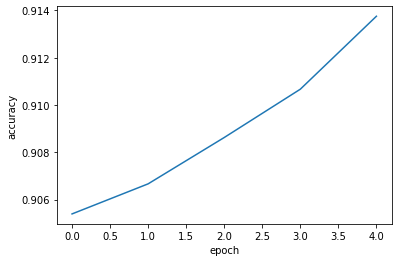

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> ***에포크마다 손실이 감소하고 정확도 향상! 에포크를 더 넣어보자***

## **손실 곡선**
에포크 횟수 20 지정

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5270 - accuracy: 0.8146
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8600
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8738
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3294 - accuracy: 0.8824
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3147 - accuracy: 0.8882
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3058 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2933 - accuracy: 0.8959
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2875 - accuracy: 0.8971
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.9019
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.274

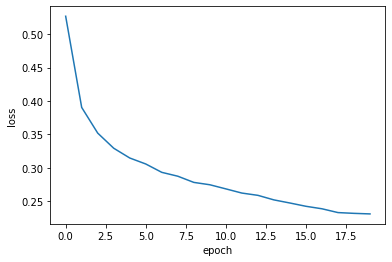

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

> 손실은 잘 감소!

하지만 과도한 훈련으로 인해 <font color='#ff0000'>과대적합</font>이 발생하지 않을까?

## **검증 손실**
에포크마다 <font color="#ffae4a">검증 손실</font> 계산

<font color="#ffae4a">validation_data</font> 매개변수: 검증용 입력과 타깃값 튜플로 전달

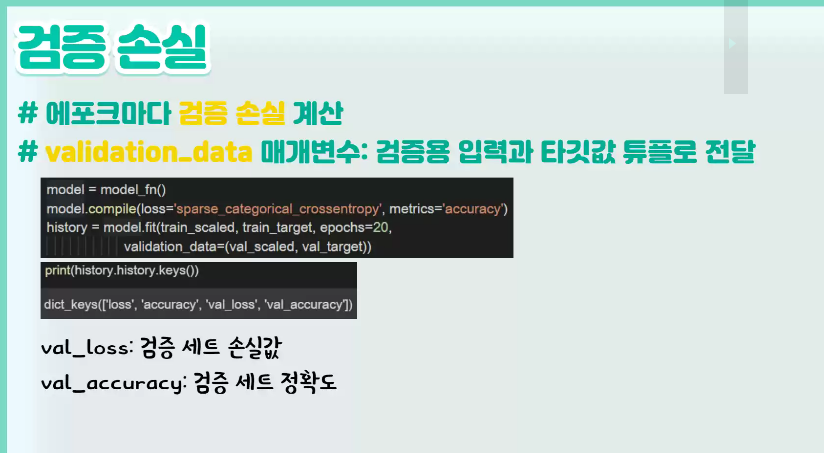

In [21]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20,
                    validation_data= (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5274 - accuracy: 0.8130 - val_loss: 0.4099 - val_accuracy: 0.8547
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3908 - accuracy: 0.8604 - val_loss: 0.3908 - val_accuracy: 0.8618
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3552 - accuracy: 0.8715 - val_loss: 0.3878 - val_accuracy: 0.8650
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8800 - val_loss: 0.3465 - val_accuracy: 0.8822
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3206 - accuracy: 0.8857 - val_loss: 0.4054 - val_accuracy: 0.8612
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8884 - val_loss: 0.3979 - val_accuracy: 0.8641
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8935 - val_loss: 0.3500 - val_accuracy:

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


> - val_loss: 검증 세트 손실값
- val_accuracy: 검증 세트 정확도

## **검증 손실**
과대/과서적합 문제 조사를 위해 한 그래프로 시각화

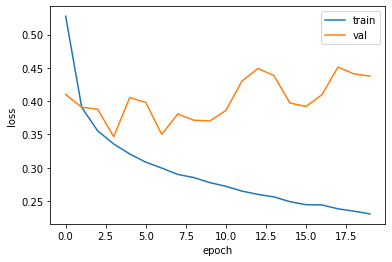

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show( )

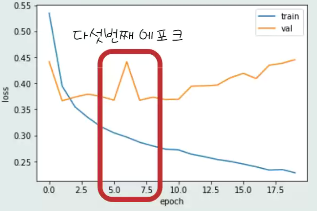

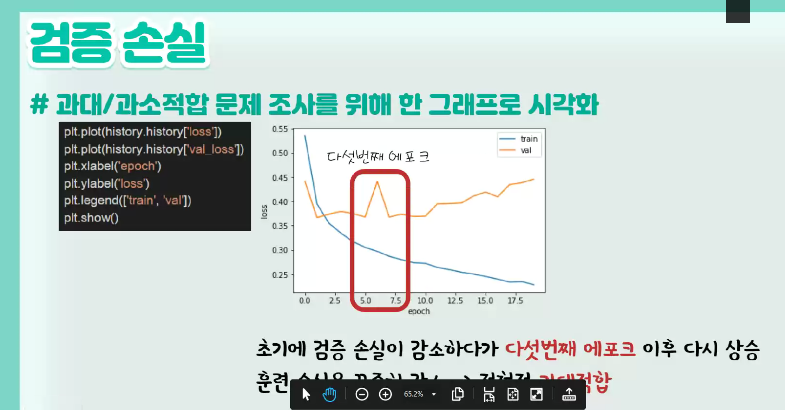

> 초기에 검증 손실이 감소하다가 다섯번째 에포크 이후 다시 상승

훈련 수신용 꾸준함 가 과대적합